## Solving an ODE using python

Ordinary differential equations describe how changes in one parameter affect another. A classic example is a harmonic oscillator.

See this link for background on second-order ODEs:

https://www.stewartcalculus.com/data/CALCULUS%20Concepts%20and%20Contexts/upfiles/3c3-AppsOf2ndOrders_Stu.pdf

In this notebook, we work with equation 3 in the above doc, exploring the solution to the ODE given various input parameters.

Our equation is:

$$ m \ddot{x} + k x + b \dot{x} = 0$$

where $m$ is the mass, $k$ is the spring stiffness, and $b$ is a damping constant.

In [1]:
# import libraries
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import scipy.optimize
from ipywidgets import interact
# This makes the plots appear inside the notebook
%matplotlib inline
# %matplotlib nbagg

We define the 0th entry of the array X as as $x$, 1th entry of X as $\dot{x}$. 

$$
\vec{X} =  \begin{pmatrix}
x\\
\dot{x}
\end{pmatrix}
$$

Then our defined function DX_dt returns the derivatives of the array X: 

$$
\dot{\vec{X}}=\begin{pmatrix}
\dot{x}\\ 
\ddot{x}
\end{pmatrix}
$$
as the right hand side of our ordinary differential equation, where $\ddot{x}$ is filled in for the derived expression in the differential equation.

The function odeint from scipy can now solve this defined DX_dt relation for $x(t)$ (and thus also $\dot{x}(t)$). 

Goal: determine what needs to be entered in the definition of DX_dt in order to solve the ODE numerically. When you think you have it correct, try running the cell and see if the result is what you expect. 

Syntax: X[0] is $x$, and X[1] is $\dot{x}$.


In [2]:
time_axis = np.arange(0, 30.0, 0.01)

def DX_dt(X, t,args):
    m = args[0]
    k = args[1]
    b = args[2]
    return [  ,  ]  # user defines the two elements of dX_dt here.

# parameters:
mass = 1 # kg
stiffness = 1 # N/m
damping = 0.2 # kg/s
params = (mass, stiffness, damping)
# initial conditions:
x0 = 1
v0 = 0

# solve ODE:
X_soln = sp.integrate.odeint(DX_dt, [x0, v0], time_axis, args=(params,))   
x_soln = X_soln[:,0]
xdot_soln = X_soln[:,1]

# plotting
plt.clf()
plt.plot(time_axis,x_soln,'b',label='ode solution')
plt.xlabel('time (sec)',fontsize=15)
plt.ylabel('mass position (meters)',fontsize=15)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.grid()
plt.title('Solution to ODE',fontsize=15)
plt.legend(frameon=False,loc=1)
plt.show()


SyntaxError: invalid syntax (<ipython-input-2-7ea0493fa029>, line 7)

It is sometimes helpful to introduce "sliders" to explore how changing a parameter changes the overall result, without having to run the lines manually each time one changes a parameter.

Below is an example of the `interact` funtion, which was loaded above from `ipywidgets`. 

Goal: Modify this example to include the solving of the ODE, making sliders for all five parameters: mass, stiffness, damping, and the two initial conditions, $x(0)$ and $v(0)$.

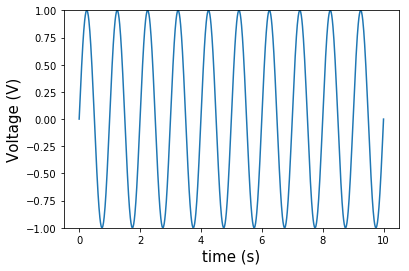

In [3]:
def plot_sine(amplitude=1.0, frequency=1.0,phase = 0.0):
    plt.ylim(-1.0, 1.0);
    time = np.linspace(0, 10, 1000)
    plt.plot(time, amplitude*np.sin(2*np.pi*frequency*time-phase));
    plt.xlabel('time (s)',fontsize=15)
    plt.ylabel('Voltage (V)',fontsize=15)

interact(plot_sine, amplitude=(0.0, 1.0),frequency=(0.2, 5.0),phase=(-6.3,6.3));


Questions to address:

1) What does making the mass larger do to the oscillations? Explain how this is intuitive.

2) What is the effect of making the spring stiffer? Does this make sense?

3) For $v(0)=0$, what effect does changing $x(0)$ have on the motion? Is the frequency of oscillation changed? What is the solution for $x(0) = 0$?

4) For $x(0) = 0$, is there nontrivial motion if $v(0)$ is modified? Explain what is going on here.

5) Adjust the parameters to find an "overdamped" situation where the mass does not oscillate. Report your parameters and include a graph of the motion.